In [71]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import classification_report

from scripts.functions import get_dataset
from scripts.functions import add_zipcode
from scripts.functions import add_province
from scripts.functions import add_region
from scripts.functions import set_feat_target
from scripts.functions import regline

import sys
# Ensure that import from parent directory is correctly implemented
sys.path.append('..')
from scripts.colors import bcolors as bc

ImportError: cannot import name 'regline' from 'scripts.functions' (c:\Users\test\Desktop\BeCodeAI\immo_Eliza_Data_Analysis\Modeling\scripts\functions.py)

## Modeling 
- Load datas
- Add zipcode from csv, based on locality column
- Add Provinces based on zipcode

In [61]:
# Load the datas 
file = '../datas/Immoweb_data_ok_maite.csv'
data = get_dataset(file)
# Add zipcode column
zip_path = "../datas/Postal_codes.csv"
data = add_zipcode(zip_path, data)
# Add Province column
data = add_province(data)
# Add Region column
data = add_region(data)

# Explore data
data.head()


,Id,Locality,House or appartment?,Subtype,Price,Type of sale,Number of rooms,Living area,Fully equipped kitchen,Furnished,...,Area of terrace,Garden,Area of garden,Land surface,Number of facades,Swimming pool,State of building,zip_code,Province,Region
0,10233388,uccle,HOUSE,HOUSE,1295000.0,BUY_REGULAR,4,290.0,1,None,...,15,None,None,230,2,0,GOOD,1180.0,Bruxelles,Brux
2,10310451,anderlecht,APARTMENT,APARTMENT,357500.0,BUY_REGULAR,3,119.0,0,None,...,16,None,None,None,4,None,NaN,1070.0,Bruxelles,Brux
3,10309870,uccle,APARTMENT,APARTMENT,295000.0,BUY_REGULAR,2,140.0,0,None,...,None,None,None,None,2,None,TO_BE_DONE_UP,1180.0,Bruxelles,Brux
4,10309546,uccle,APARTMENT,APARTMENT,199000.0,BUY_REGULAR,1,61.0,0,None,...,2,None,None,None,2,None,NaN,1180.0,Bruxelles,Brux
5,10308639,berchem-sainte-agathe,HOUSE,HOUSE,485000.0,BUY_REGULAR,3,235.0,0,None,...,None,1,100,200,2,0,TO_BE_DONE_UP,1082.0,Bruxelles,Brux


In [62]:
print(data.info())
# print(data.describe())
# print(data['Region'].value_counts())
# print(data['Number of rooms'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12277 entries, 0 to 23381
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      12277 non-null  int64  
 1   Locality                12277 non-null  object 
 2   House or appartment?    12277 non-null  object 
 3   Subtype                 12277 non-null  object 
 4   Price                   12277 non-null  float64
 5   Type of sale            12277 non-null  object 
 6   Number of rooms         12277 non-null  int32  
 7   Living area             12277 non-null  float64
 8   Fully equipped kitchen  12277 non-null  object 
 9   Furnished               12277 non-null  object 
 10  Open fire               12277 non-null  int64  
 11  Terrace                 12277 non-null  object 
 12  Area of terrace         12277 non-null  object 
 13  Garden                  12277 non-null  object 
 14  Area of garden          12277 non-null

#### Correlation

C:\Users\test\AppData\Local\Temp\ipykernel_18996\540660637.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


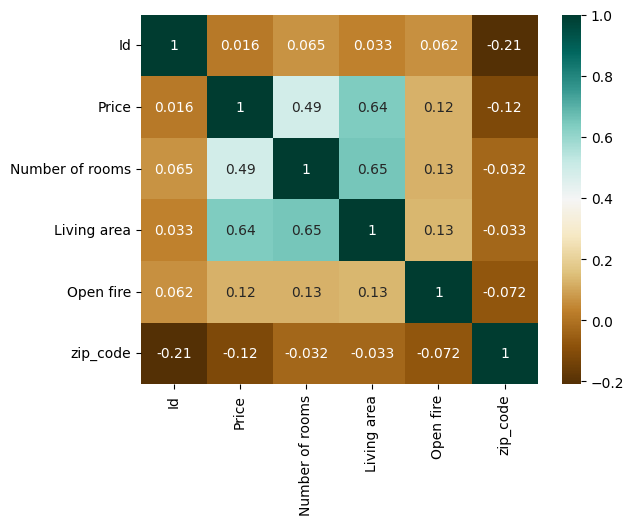

In [63]:
correlation = data.corr()
dataplot = sns.heatmap(correlation, cmap="BrBG", annot=True)

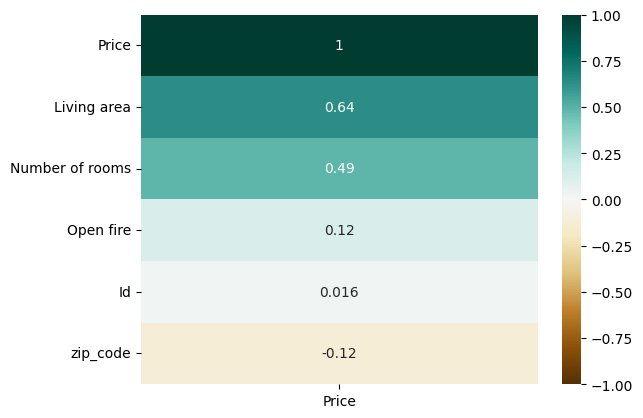

In [64]:
heatmap = sns.heatmap(correlation[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

### Explore data outliers

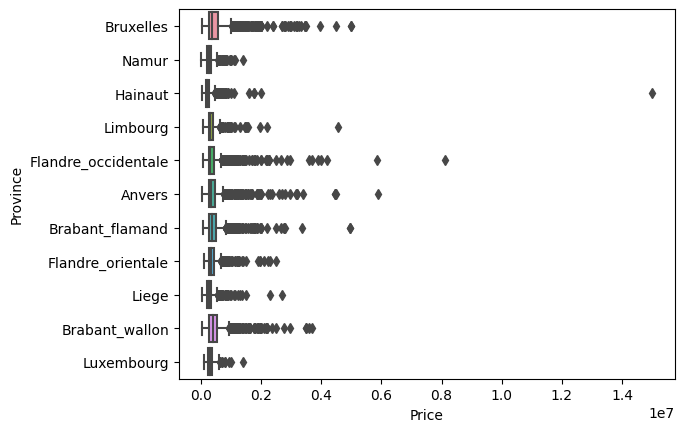

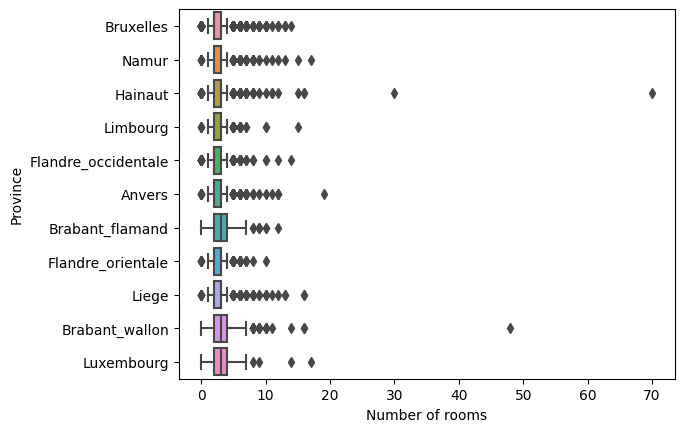

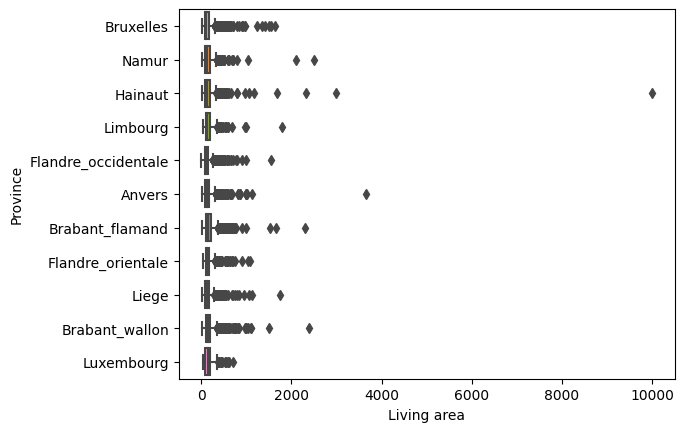

In [65]:
plt.figure()
outliers_Price = sns.boxplot(data=data, x="Price", y='Province')
plt.figure()
outliers_Number_of_rooms = sns.boxplot(data=data, x="Number of rooms", y='Province')
plt.figure()
outliers_Living_area = sns.boxplot(data=data, x="Living area", y='Province')
# sns.close()


In [66]:
# print(data['Price'].describe())
# Remove outliers from Price column
q1_price , q3_price = data['Price'].quantile([0.25,0.75])
iqr_price = q3_price - q1_price
print(q1_price, q3_price, iqr_price)
iqr_coef = 1.5
data = data[(data['Price'] > (q1_price - (iqr_coef*iqr_price))) & (data['Price'] < (q3_price + (iqr_coef*iqr_price)))]
# print(data['Price'].describe())

# Remove outliers from Living area column
print(data['Living area'].describe())
q1_la , q3_la = data['Living area'].quantile([0.25,0.75])
iqr_price = q3_la - q1_la
print(q1_la, q3_la, iqr_price)
iqr_coef = 2
data = data[(data['Living area'] > (q1_la - (iqr_coef*iqr_price))) & (data['Living area'] < (q3_la + (iqr_coef*iqr_price)))]
print(data['Living area'].describe())

# Remove outliers from Number of rooms column
print(data['Number of rooms'].describe())
q1_nr , q3_nr = data['Number of rooms'].quantile([0.25,0.75])
iqr_price = q3_nr - q1_nr
print(q1_nr, q3_nr, iqr_price)
iqr_coef = 5
data = data[(data['Number of rooms'] > (q1_nr - (iqr_coef*iqr_price))) & (data['Number of rooms'] < (q3_nr + (iqr_coef*iqr_price)))]
print(data['Number of rooms'].describe())

plt.show()

249000.0 450000.0 201000.0
count    11293.000000
mean       141.537767
std         91.831988
min          1.000000
25%         90.000000
50%        120.000000
75%        170.000000
max       3665.000000
Name: Living area, dtype: float64
90.0 170.0 80.0
count    10976.000000
mean       132.129555
std         58.424565
min          1.000000
25%         90.000000
50%        119.000000
75%        166.000000
max        329.000000
Name: Living area, dtype: float64
count    10976.000000
mean         2.570062
std          1.133066
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: Number of rooms, dtype: float64
2.0 3.0 1.0
count    10955.000000
mean         2.558101
std          1.100059
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: Number of rooms, dtype: float64


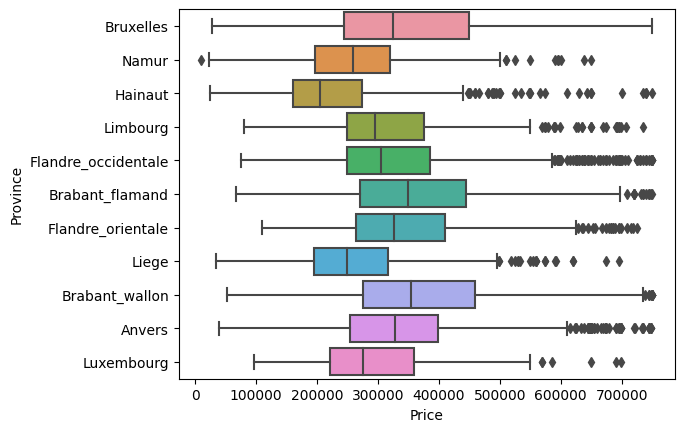

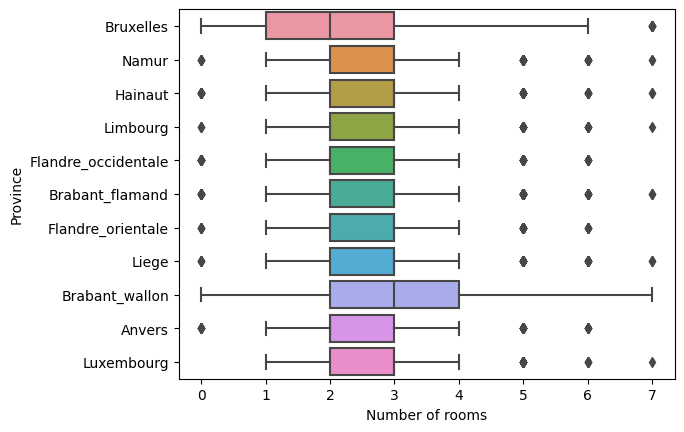

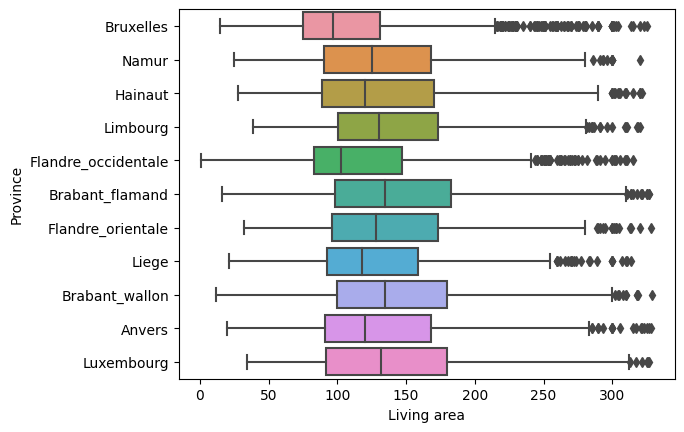

In [67]:
plt.figure()
outliers_removed_Price = sns.boxplot(data=data, x="Price", y='Province')
plt.figure()
outliers_removed_Number_of_rooms = sns.boxplot(data=data, x="Number of rooms", y='Province')
plt.figure()
outliers_removed_Living_area = sns.boxplot(data=data, x="Living area", y='Province')
# sns.close()

- Slice df for modeling
- Split feature, target
- Split train, test
- Normalize or standardise

In [68]:
# Select columns for modeling
# print(data.columns)
data_model_house = data[data['House or appartment?'] == 'HOUSE'][['Price', 'Province', 'Living area','Number of rooms']]
print(data_model_house.head())
print(data_model_house.shape[0])
# Get dummies for Province columns
data_model_house = pd.get_dummies(data_model_house, columns =['Province'],drop_first=False )
print(data_model_house.columns)
# Split features, target
X, y = set_feat_target(data_model_house)
# Split into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 12)
# Standardisation
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
print(f"y head : {y[:1,:]},\nX head : {X[:1,:]}")
print(f"y_test first : {y_test[:1,:]},\nX_test first : {X_test[:1,:]}")

       Price   Province  Living area  Number of rooms
5   485000.0  Bruxelles        235.0                3
6   595000.0  Bruxelles        276.0                7
8   386000.0  Bruxelles        100.0                3
10  515000.0  Bruxelles        172.0                5
24  589000.0  Bruxelles        304.0                4
4997
Index(['Price', 'Living area', 'Number of rooms', 'Province_Anvers',
       'Province_Brabant_flamand', 'Province_Brabant_wallon',
       'Province_Bruxelles', 'Province_Flandre_occidentale',
       'Province_Flandre_orientale', 'Province_Hainaut', 'Province_Liege',
       'Province_Limbourg', 'Province_Luxembourg', 'Province_Namur'],
      dtype='object')
y head : [[485000.]],
X head : [[235.   3.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]]
y_test first : [[299000.]],
X_test first : [[118.   2.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


### Linear Regression
- Instanciate linear regression
- Fit the model and get score
- Test the model and get score


In [69]:
# Model instanciation
regressor = linear_model.LinearRegression()

# Train the model
regressor.fit(X_train, y_train)
print(f"REGRESSOR\n {bc.OKBLUE}Intercept{bc.ENDC}: {regressor.intercept_[0]},\n {bc.OKBLUE}Coef{bc.ENDC}:{regressor.coef_[0]}")
accuracy_train = round(regressor.score(X_train, y_train)*100,2)
print(f"Linear {bc.OKBLUE}train{bc.ENDC} score : {bc.OKGREEN if accuracy_train > 60 else bc.WARNING if accuracy_train > 50 else bc.FAIL}{accuracy_train}{bc.ENDC} %")

# Test the model
accuracy_test = round(regressor.score(X_test, y_test)*100, 2)
print(f"Linear {bc.OKBLUE}test{bc.ENDC} score : {bc.OKGREEN if accuracy_test > 60 else bc.WARNING if accuracy_test > 50 else bc.FAIL}{accuracy_test}{bc.ENDC} %")

# Prediction
pred_test = regressor.predict(X_test)
pred_train = regressor.predict(X_train)

REGRESSOR
 Intercept: 106623.76955865143,
 Coef:[   1149.99731414   12952.21240387   30816.46817424   56107.5588529
   57510.79334895  122215.51871103   -1195.32576022   22977.35767026
 -101857.60193582  -68252.80329295  -14025.0266957   -41271.94818731
  -63024.99088537]
Linear train score : 46.46 %
Linear test score : 43.56 %


### Plot results

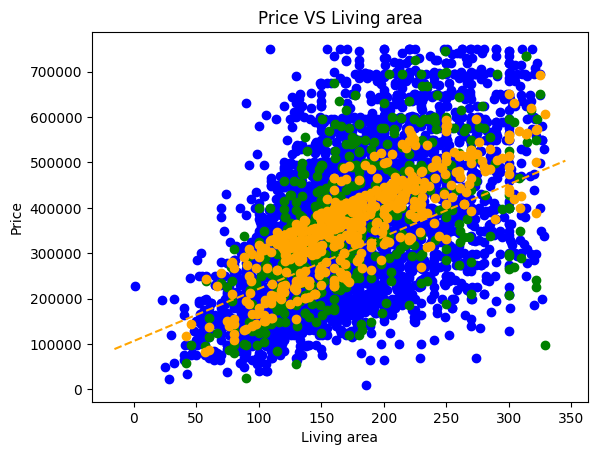

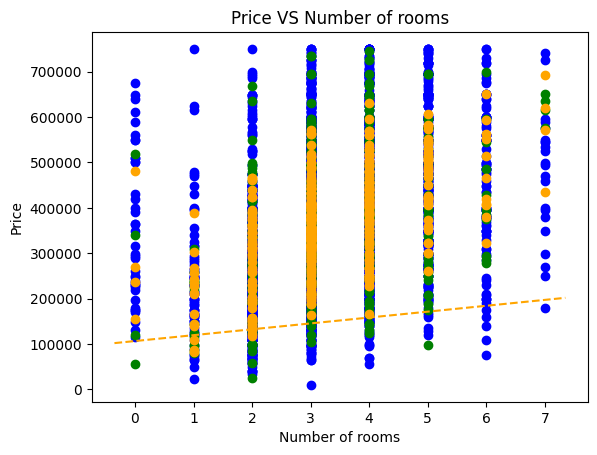

In [70]:
# X[0] = "Living Area"
# X[1] = "Number of rooms"
# X[2:] = "Province"





# Plot the predicted values against the input values
plt.scatter(X_train[:,0], y_train, color='blue')
# plt.scatter(X_train[:,0], pred_train, color='red')
plt.scatter(X_test[:,0], y_test, color='green')
plt.scatter(X_test[:,0], pred_test, color='orange')
line_Living_area = abline(regressor.coef_[0][0],regressor.intercept_[0],'orange')

# Label the plot
plt.title("Price VS Living area")
plt.xlabel('Living area')
plt.ylabel('Price')

# Show the plot
plt.show()
plt.close()

# Plot the predicted values against the input values
plt.scatter(X_train[:,1], y_train, color='blue', )
# plt.scatter(X_train[:,1], pred_train, color='red')
plt.scatter(X_test[:,1], y_test, color='green')
plt.scatter(X_test[:,1], pred_test, color='orange')
# print(regressor.intercept_[0],regressor.coef_[0][1])
line_Number_rooms = abline(regressor.coef_[0][1],regressor.intercept_[0],'orange')

# Label the plot
plt.title("Price VS Number of rooms")
plt.xlabel('Number of rooms')
plt.ylabel('Price')

# Show the plot
plt.show()
plt.close()